In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\hb292\Downloads\social_ads.csv")
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


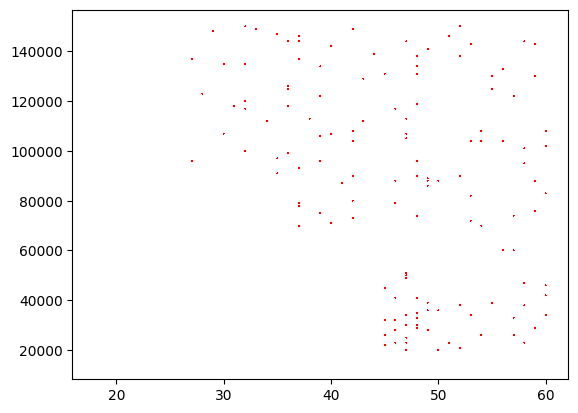

In [3]:
plt.scatter(df.Age, df.EstimatedSalary,df.Purchased, marker='+', color='red')

In [4]:
df.shape

(400, 3)

In [5]:
from sklearn.model_selection import train_test_split
X = df[['Age', 'EstimatedSalary']]
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_test

,Age,EstimatedSalary
288,41,79000
152,31,76000
234,38,112000
182,32,117000
163,35,38000
...,...,...
299,46,117000
107,27,89000
370,60,46000
186,20,82000


In [7]:
y_test

288    0
152    0
234    0
182    1
163    0
      ..
299    1
107    0
370    1
186    0
132    0
Name: Purchased, Length: 80, dtype: int64

In [8]:
X_train

,Age,EstimatedSalary
120,36,75000
229,42,80000
269,40,61000
200,35,39000
236,40,57000
...,...,...
298,45,79000
36,33,28000
25,47,20000
268,47,144000


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [12]:
model.score(X_test, y_test)

0.8

In [13]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)


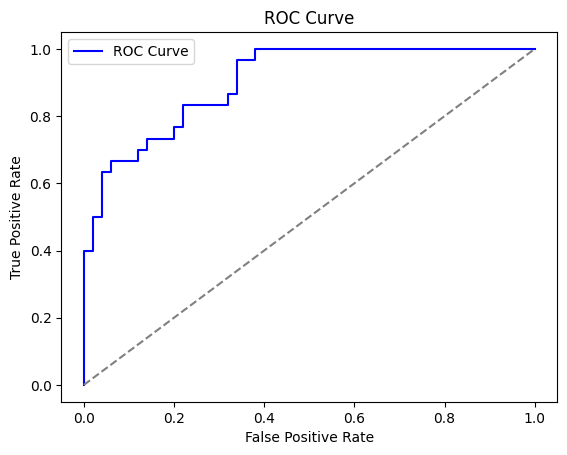

In [14]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.9033333333333333
